In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize
import requests
from PIL import Image
from io import BytesIO
import time

from IPython.display import Image

In [1]:
import ee

# Trigger the authentication flow.
ee.Authenticate()

# Initialize the library.
ee.Initialize(project='satvis-425514')

In [87]:
lc = ee.ImageCollection('MODIS/061/MCD12Q1')

In [88]:
# Define the urban location of interest as a point near Lyon, France.
buc_lon = 26.0963
buc_lat = 44.4396
buc_poi = ee.Geometry.Point(buc_lon, buc_lat)

In [89]:
roi = buc_poi.buffer(1e5)
i_date = '2017-01-01'

In [92]:
lc_img = lc.select('LC_Type1').filterDate(i_date).first()

url = lc_img.getThumbUrl({
    'min': 1,'max': 17, 'dimensions':1024, 'region': roi,
    'palette': ['05450a','086a10', '54a708', '78d203', '009900', 'c6b044',
                'dcd159', 'dade48', 'fbff13', 'b6ff05', '27ff87', 'c24f44',
                'a5a5a5', 'ff6d4c', '69fff8', 'f9ffa4', '1c0dff']
})

print(url)
print('\nWait while loading...')
Image(url=url)

https://earthengine.googleapis.com/v1/projects/satvis-425514/thumbnails/e4cb15087f83a5165a1e6dd53af34d41-ceb4e3d6cc32c7fcd009935368fa60da:getPixels

Wait while loading...


In [93]:
import requests
from PIL import Image
from io import BytesIO

# Fetch the image from the URL
response = requests.get(url)
img = Image.open(BytesIO(response.content))

# Save the image as a .jpg file
img.save('your_image.jpg', 'JPEG')


Image saved as 'your_image.jpg'


In [98]:
left_up_lat = 47.50 
left_up_lon = 20.00

left_down_lat = 43.50 
left_down_lon = 20.00

right_down_lat = 43.50 
right_down_lon = 29.50

right_up_lat = 47.50
right_up_lon = 29.50

lat_range = np.arange(left_down_lat, left_up_lat, 1)
lon_range = np.arange(left_down_lon, right_down_lon, 1)

date = '2020-15-02'


In [99]:
from PIL import Image

for lat in lat_range:
    for lon in lon_range:
        # Generate Image
        roi = ee.Geometry.Point(lon, lat).buffer(1e5)
        img = lc.select('LC_Type1').filterDate(date).first()
        url = lc_img.getThumbUrl({
            'min': 1,'max': 17, 'dimensions':1024, 'region': roi,
            'palette': ['05450a','086a10', '54a708', '78d203', '009900', 'c6b044',
                        'dcd159', 'dade48', 'fbff13', 'b6ff05', '27ff87', 'c24f44',
                        'a5a5a5', 'ff6d4c', '69fff8', 'f9ffa4', '1c0dff']})
        
        time.sleep(5)  # Adjust the sleep time if necessary
        # Save that MF
        response = requests.get(url)
        img = Image.open(BytesIO(response.content))
        img.save(f'images_romania/2020/ro_lat{lat}_lon{lon}_{date}.jpg', 'JPEG')
    

In [96]:
labels = ['forest', 'field', 'mountain', 'hill', 'water']

# Computer Vision

### Masking Color

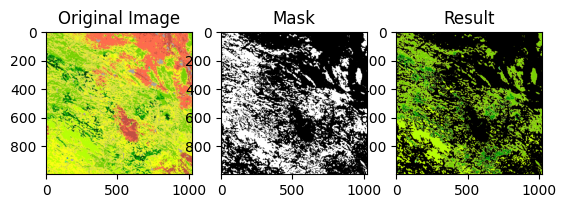

In [102]:
import cv2

image = cv2.imread('images_romania/2002/ro_lat43.5_lon20.0_2002-15-02.jpg')

hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

lower_green = np.array([35, 100, 100])
upper_green = np.array([85, 255, 255])

mask = cv2.inRange(hsv_image, lowerb=lower_green, upperb=upper_green)
result = cv2.bitwise_and(image, image, mask=mask)

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(mask, cmap='gray')
plt.title('Mask')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.title('Result')

plt.show()

### Comparing 2 Images

In [109]:
image1 = cv2.imread('images_romania/2002/ro_lat44.5_lon20.0_2002-15-02.jpg')
image2 = cv2.imread('images_romania/2020/ro_lat43.5_lon20.0_2020-15-02.jpg')

if image1.shape != image2.shape:
    print('The images have different sizes or number of channels')
else: 
    difference = cv2.absdiff(image1, image2)
    result = not np.any(difference)
    
    if result:
        print('They are the same')
    else:
        print('They are not the same')
        cv2.imwrite('difference.jpg', difference)

They are not the same


In [105]:
for lat in lat_range:
    for lon in lon_range:
        image1 = cv2.imread(f'images_romania/2002/ro_lat{lat}_lon{lon}_2002-15-02.jpg')
        image2 = cv2.imread(f'images_romania/2020/ro_lat{lat}_lon{lon}_2020-15-02.jpg')

        if image1.shape != image2.shape:
            print('The images have different sizes or number of channels')
        else: 
            difference = cv2.absdiff(image1, image2)
            result = not np.any(difference)
            
            if result:
                print(f'At {lat} {lon} they are the same!')
            else:
                print(f'At {lat} {lon} they are not the same!')
                cv2.imwrite('difference.jpg', difference)

At 43.5 20.0 they are the same!
At 43.5 21.0 they are the same!
At 43.5 22.0 they are the same!
At 43.5 23.0 they are the same!
At 43.5 24.0 they are the same!
At 43.5 25.0 they are the same!
At 43.5 26.0 they are the same!
At 43.5 27.0 they are the same!
At 43.5 28.0 they are the same!
At 43.5 29.0 they are the same!
At 44.5 20.0 they are the same!
At 44.5 21.0 they are the same!
At 44.5 22.0 they are the same!
At 44.5 23.0 they are the same!
At 44.5 24.0 they are the same!
At 44.5 25.0 they are the same!
At 44.5 26.0 they are the same!
At 44.5 27.0 they are the same!
At 44.5 28.0 they are the same!
At 44.5 29.0 they are the same!
At 45.5 20.0 they are the same!
At 45.5 21.0 they are the same!
At 45.5 22.0 they are the same!
At 45.5 23.0 they are the same!
At 45.5 24.0 they are the same!
At 45.5 25.0 they are the same!
At 45.5 26.0 they are the same!
At 45.5 27.0 they are the same!
At 45.5 28.0 they are the same!
At 45.5 29.0 they are the same!
At 46.5 20.0 they are the same!
At 46.5 